In [58]:
import pandas as pd 
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import cross_val_score





In [114]:
df = pd.read_csv("train.csv")
pd.set_option("display.max_columns", None)
cluster = pd.read_csv("df_veloc.csv")

In [115]:
df['weather'] = cluster['cluster']

In [116]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,2,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,2,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,2,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,2,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,2,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,0,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,0,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,3,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,3,13.94,17.425,61,6.0032,12,117,129


In [117]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [118]:
df['month'] = df['datetime'].dt.month

In [119]:
df['day'] = df['datetime'].dt.day

In [120]:
df['hours'] = df['datetime'].dt.hour

In [121]:
for i in range(1,13):
    month_mask = (df['month'] == i)
    if i == 1 or i == 2 or i == 12:
        df.loc[month_mask, 'season'] = 4
    elif i == 3 or i == 4 or i == 5:
        df.loc[month_mask, 'season'] = 1
    elif i == 6 or i == 7 or i == 8:
        df.loc[month_mask, 'season'] = 2
    else:
        df.loc[month_mask, 'season'] = 3

In [122]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours
0,2011-01-01 00:00:00,4,0,0,2,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,4,0,0,2,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,4,0,0,2,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,4,0,0,2,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,4,0,0,2,9.84,14.395,75,0.0000,0,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,0,15.58,19.695,50,26.0027,7,329,336,12,19,19
10882,2012-12-19 20:00:00,4,0,1,0,14.76,17.425,57,15.0013,10,231,241,12,19,20
10883,2012-12-19 21:00:00,4,0,1,3,13.94,15.910,61,15.0013,4,164,168,12,19,21
10884,2012-12-19 22:00:00,4,0,1,3,13.94,17.425,61,6.0032,12,117,129,12,19,22


In [123]:
df['weekday'] = df['datetime'].dt.weekday

In [124]:
df['date'] = df['datetime'].dt.date

In [125]:
plt.figure(figsize=(200, 200))


<Figure size 14400x14400 with 0 Axes>

<Figure size 14400x14400 with 0 Axes>

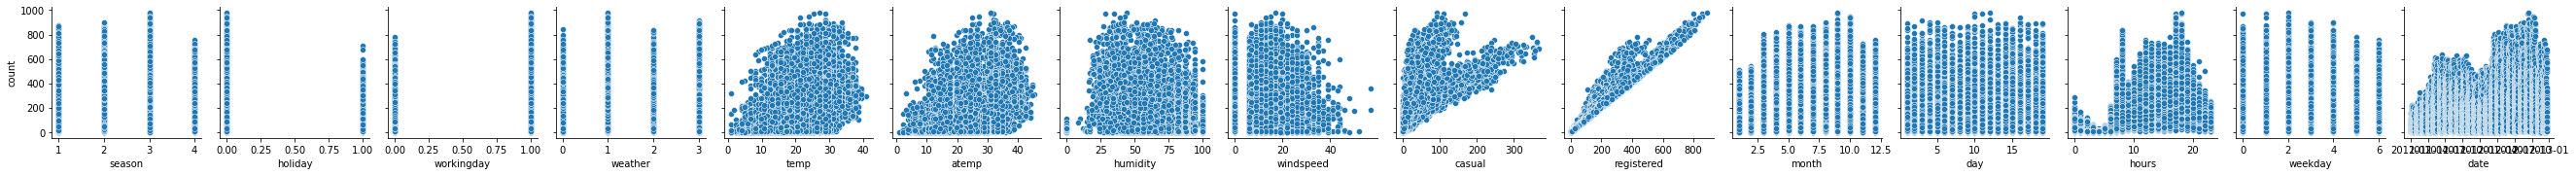

In [126]:
ax = sns.pairplot(data=df, x_vars=df.drop(['count', 'datetime'], axis=1).columns, y_vars='count')
plt.show(ax)


<Figure size 1440x1440 with 0 Axes>

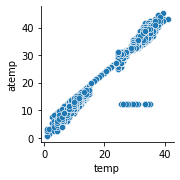

In [127]:
plt.figure(figsize=(20,20))
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

plt.show()

In [128]:
df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'atemp'] = df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'temp'] 


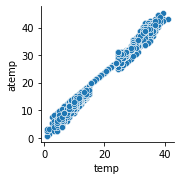

In [129]:
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

In [130]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
month         0
day           0
hours         0
weekday       0
date          0
dtype: int64

In [131]:
mask_night = (df['hours'] < 6) | (df['hours'] > 23)
df.loc[mask_night, 'part_of_day'] = 1

In [132]:
mask_morning = (df['hours']>5) & (df['hours'] < 13)
df.loc[mask_morning, 'part_of_day'] = 3

In [133]:
mask_afternoon = (df['hours']> 12) & (df['hours'] < 19)
df.loc[mask_afternoon, 'part_of_day'] = 4

In [134]:
mask_midnight = (df['hours']>18) & (df['hours'] <= 23)
df.loc[mask_midnight, 'part_of_day'] = 2

In [135]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,weekday,date,part_of_day
0,2011-01-01 00:00:00,4,0,0,2,9.84,14.395,81,0.0000,3,13,16,1,1,0,5,2011-01-01,1.0
1,2011-01-01 01:00:00,4,0,0,2,9.02,13.635,80,0.0000,8,32,40,1,1,1,5,2011-01-01,1.0
2,2011-01-01 02:00:00,4,0,0,2,9.02,13.635,80,0.0000,5,27,32,1,1,2,5,2011-01-01,1.0
3,2011-01-01 03:00:00,4,0,0,2,9.84,14.395,75,0.0000,3,10,13,1,1,3,5,2011-01-01,1.0
4,2011-01-01 04:00:00,4,0,0,2,9.84,14.395,75,0.0000,0,1,1,1,1,4,5,2011-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,0,15.58,19.695,50,26.0027,7,329,336,12,19,19,2,2012-12-19,2.0
10882,2012-12-19 20:00:00,4,0,1,0,14.76,17.425,57,15.0013,10,231,241,12,19,20,2,2012-12-19,2.0
10883,2012-12-19 21:00:00,4,0,1,3,13.94,15.910,61,15.0013,4,164,168,12,19,21,2,2012-12-19,2.0
10884,2012-12-19 22:00:00,4,0,1,3,13.94,17.425,61,6.0032,12,117,129,12,19,22,2,2012-12-19,2.0


In [136]:
mask_2012 = (df['datetime'].dt.year == 2012) 
df.loc[mask_2012 & (df['month']>7)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,weekday,date,part_of_day
8607,2012-08-01 00:00:00,2,0,1,2,27.88,31.820,79,11.0014,3,44,47,8,1,0,2,2012-08-01,1.0
8608,2012-08-01 01:00:00,2,0,1,2,27.06,30.305,83,6.0032,5,28,33,8,1,1,2,2012-08-01,1.0
8609,2012-08-01 02:00:00,2,0,1,2,26.24,28.790,83,7.0015,0,13,13,8,1,2,2,2012-08-01,1.0
8610,2012-08-01 03:00:00,2,0,1,2,26.24,28.790,83,7.0015,0,7,7,8,1,3,2,2012-08-01,1.0
8611,2012-08-01 04:00:00,2,0,1,2,26.24,29.545,78,8.9981,1,3,4,8,1,4,2,2012-08-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,0,15.58,19.695,50,26.0027,7,329,336,12,19,19,2,2012-12-19,2.0
10882,2012-12-19 20:00:00,4,0,1,0,14.76,17.425,57,15.0013,10,231,241,12,19,20,2,2012-12-19,2.0
10883,2012-12-19 21:00:00,4,0,1,3,13.94,15.910,61,15.0013,4,164,168,12,19,21,2,2012-12-19,2.0
10884,2012-12-19 22:00:00,4,0,1,3,13.94,17.425,61,6.0032,12,117,129,12,19,22,2,2012-12-19,2.0


In [137]:
df['difference_atemp_temp'] = df['atemp'] - df['temp']

In [138]:
from dython.nominal import associations

## heat map 

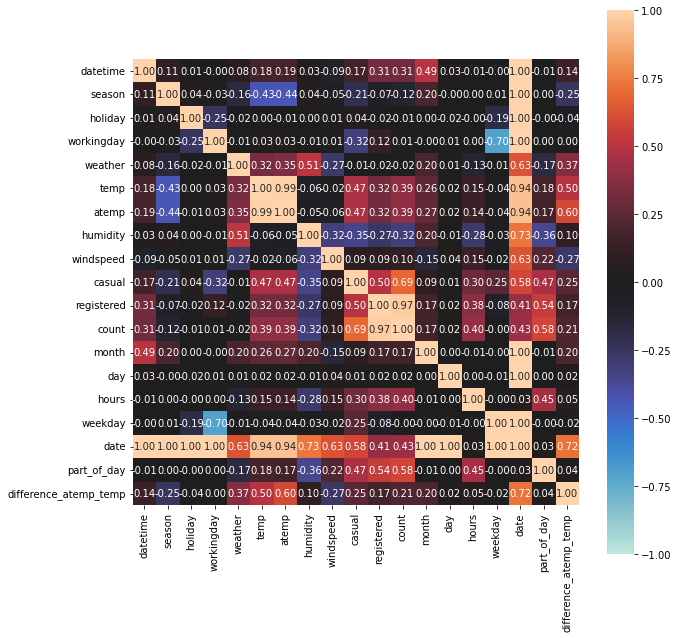

In [139]:
selected_column= df
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

<AxesSubplot:>

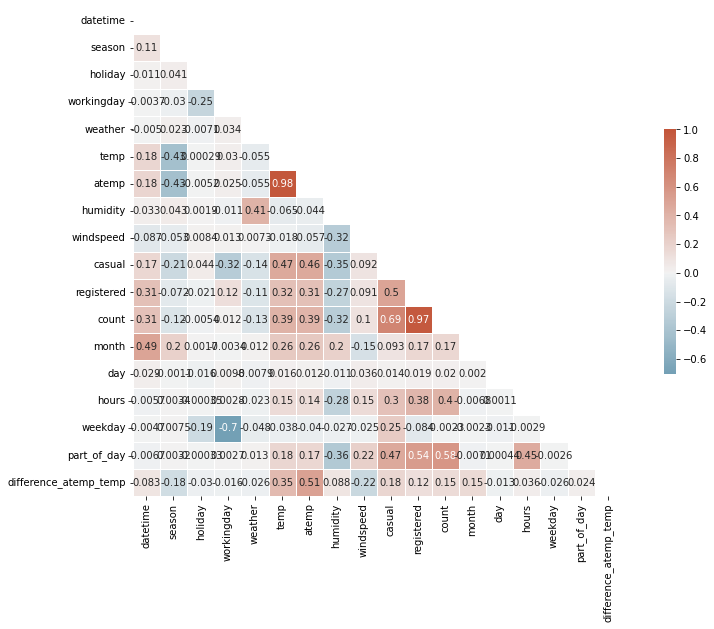

In [84]:
mask = np.triu(np.ones_like(categorical_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(categorical_correlation['corr'], mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

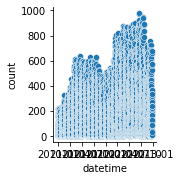

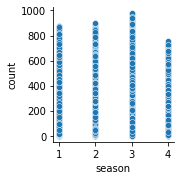

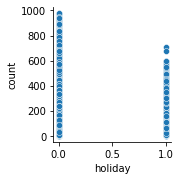

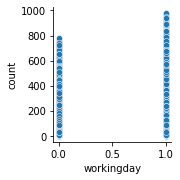

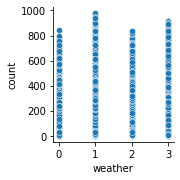

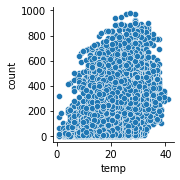

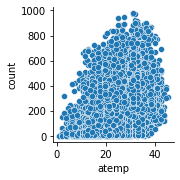

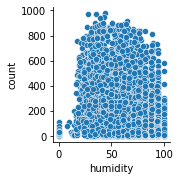

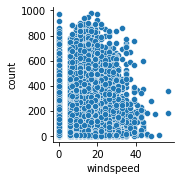

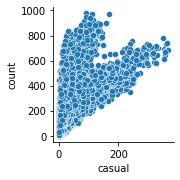

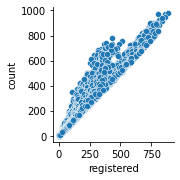

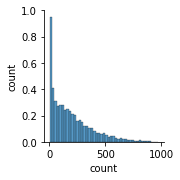

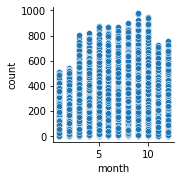

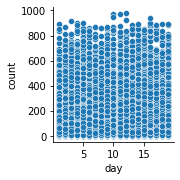

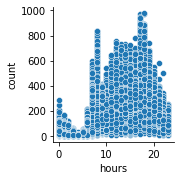

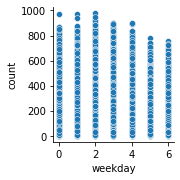

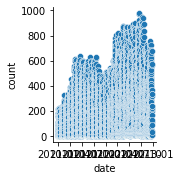

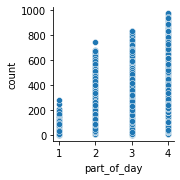

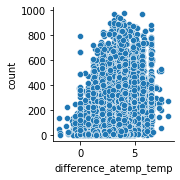

In [140]:
for col in df.columns:
    ax = sns.pairplot(data=df, x_vars=col, y_vars='count')
    plt.show(ax)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, FunctionTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [142]:
mask_df_train= (df['datetime'] <= ('2012-8-19 23:00:00')) 
df_train = df.loc[mask_df_train]

In [143]:
mask_df_test= (df['datetime'] > ('2012-8-19 23:00:00')) 
df_test = df.loc[mask_df_test]

## split for model with target: count

In [151]:
X_train = df_train.drop(['count','datetime', 'casual', 'registered',   'day','atemp','temp','season','date',], axis = 1)

X_test = df_test.drop(['count','datetime', 'casual', 'registered',  'day','atemp', 'temp', 'season', 'date',], axis = 1)

y_train = df_train['count']
y_train_stand= StandardScaler().fit_transform(df_train[['count']])
y_test_stand = StandardScaler().fit_transform(df_test[['count']])
y_test = df_test['count']


creer des catego pour les heures (discrétiser)

In [146]:
y_test_stand

array([[-0.40624309],
       [-0.81922123],
       [-0.86562326],
       ...,
       [-0.40624309],
       [-0.58721104],
       [-0.77745939]])

In [152]:
continuous = ['holiday','workingday',	'humidity',	'windspeed', 'part_of_day', 'difference_atemp_temp', 'weekday']
onehot = ['weather']
log = FunctionTransformer(np.log1p)
preprocessor = make_column_transformer((RobustScaler(), continuous),(OneHotEncoder(), onehot),remainder='passthrough')



In [153]:
X_train

,holiday,workingday,weather,humidity,windspeed,month,hours,weekday,part_of_day,difference_atemp_temp
0,0,0,2,81,0.0000,1,0,5,1.0,4.555
1,0,0,2,80,0.0000,1,1,5,1.0,4.615
2,0,0,2,80,0.0000,1,2,5,1.0,4.615
3,0,0,2,75,0.0000,1,3,5,1.0,4.555
4,0,0,2,75,0.0000,1,4,5,1.0,4.555
...,...,...,...,...,...,...,...,...,...,...
9058,0,0,3,73,8.9981,8,19,6,2.0,4.065
9059,0,0,3,73,12.9980,8,20,6,2.0,4.065
9060,0,0,2,78,6.0032,8,21,6,2.0,4.125
9061,0,0,2,78,11.0014,8,22,6,2.0,4.125


# grid search cv 

In [ ]:
# parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
#  'max_features': ['auto', 'sqrt', 'log2'], 
#  'min_impurity_decrease': (0.001, 0.0), 
#  'ccp_alpha': (0.0, 0.00001, 0.001)}

# parameter = {'criterion': ['squared_error', 'absolute_error', 'poisson']}

# features = preprocessor.fit_transform(X_train)
# model =  RandomForestRegressor()
# gridsearch = RandomizedSearchCV(model, parameters)
# gridsearch.fit(features, y_train)

In [ ]:
# gridsearch.best_params_

In [149]:
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse
from sklearn.metrics import mean_absolute_error, mean_squared_error
# experiment_id = mlflow.create_experiment("velo")

In [ ]:
# experiment_id = mlflow.create_experiment("veloc_rf")

In [154]:
with mlflow.start_run(experiment_id = 2):
    rf = RandomForestRegressor(warm_start=True, oob_score=True,
    min_impurity_decrease=0.001, max_features='auto', ccp_alpha=0.000001)

    model_forest =rf
    model_forest.fit(X_train, y_train)
    y_pred = model_forest.predict(X_test)

    score = model_forest.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # cross_val_score(model, X, y, cv=3)
    print(' r2: %s' % score)
    print(' mse: %s' % mse)
    print(' mae: %s' % mae)


    mlflow.log_metric("r2", score)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mae", mae)

    


 r2: 0.649075228066768
 mse: 16298.2106335785
 mae: 89.66063865892636


In [ ]:
import pickle

In [ ]:
# with open('model_pickle.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [ ]:
from sklearn.model_selection import learning_curve
import lightgbm as lgbm

In [ ]:
X_train_lgb = df_train.drop(['count','datetime', 'casual', 'registered',
 'difference_atemp_temp', 'day', 'date',
  'month', 'season',
   'part_of_day', 'windspeed'], axis = 1)

X_test_lgb = df_test.drop(['count','datetime', 'casual', 'registered',
 'difference_atemp_temp', 'day', 'date',
  'month', 'season',
   'part_of_day', 'windspeed'], axis = 1)

y_train = df_train['count']

y_test = df_test['count']

In [ ]:
categorial = [ 'week', 'holiday','weather', 'workingday']
continuous = ['humidity',  'atemp','temp', 'hours']
preprocessor_lgb = make_column_transformer((OneHotEncoder(),categorial), remainder='passthrough')

In [ ]:
clf = lgbm.LGBMRegressor(
subsample= 0.9,
num_leaves= 80,
min_split_gain= 0.1,
max_depth= 40,
learning_rate= 0.1,
colsample_bytree= 1)
model_lgb = make_pipeline(preprocessor, clf)
model_lgb.fit(X_train, y_train)
model_lgb.score(X_test, y_test)

0.6522348251437582

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso, Ridge


In [ ]:
estimator = [('rf',rf),('lgbm', clf),('lasso', Lasso()), ('ridge', Ridge())]
reg = make_pipeline(preprocessor,StackingRegressor(estimators=estimator))

In [ ]:
reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['holiday', 'workingday',
                                                   'weather', 'temp',
                                                   'humidity', 'windspeed',
                                                   'part_of_day',
                                                   'difference_atemp_temp',
                                                   'season'])])),
                ('stackingregressor',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(ccp_alpha=1e-06,
                                                                      min_impurity_decrease=0.001,
                                                              

In [ ]:
reg.score(X_test, y_test)

0.587249505911114

In [ ]:
N, train_score, val_score = learning_curve(reg, X_train, y_train,train_sizes=np.linspace(0.1,1.0,10),scoring='r2' ,cv=5, random_state=1)

print(N)
plt.rcParams["figure.figsize"]=[16,9]
fig = plt.figure()
fig.patch.set_facecolor('blue')
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel('train_sizes')
plt.legend()

KeyboardInterrupt: 

In [ ]:
X_train

,holiday,workingday,weather,temp,humidity,windspeed,month,hours,week
3224,0,1,2,27.88,89,19.9995,8,6,Thursday
1299,0,0,2,24.60,53,16.9979,3,0,Saturday
3489,0,1,1,24.60,88,16.9979,8,7,Monday
7649,0,1,1,19.68,67,8.9981,5,2,Friday
5950,0,0,1,9.84,75,0.0000,2,3,Saturday
...,...,...,...,...,...,...,...,...,...
2895,0,0,1,33.62,41,15.0013,7,13,Saturday
7813,0,1,1,22.96,52,7.0015,6,22,Tuesday
905,0,1,1,8.20,75,8.9981,3,4,Wednesday
5192,0,0,1,13.12,57,16.9979,12,10,Saturday
